## ARMA 모형

In [4]:
library(forecast)
options(repr.plot.width = 16, repr.plot.height = 9)

`-` $AR(p)$ process

$Z_t = \delta + \phi Z_{t-1} + \cdots + \phi Z_{t-p} + \epsilon, ~ \epsilon_t \sim WN(0, \sigma^2)$

In [21]:
sim_ar = function(n, mu, phi) {
    p = length(phi)
    z = c(rep(mu, p), rep(0, (n+100)-p))

    ## AR(1) : Z = f(mu,0,0,0,0,...) AR(1)이니까 최초 데이터만 먼저 생성
    ## AR(2) : Z = f(mu,mu,0,0,0,...)
    
    delta = (1-sum(phi))*mu ## phi는 가중치들의 벡터로 입력
    ## AR(1) : delta = (1-phi)*mu
    ## AR(2) : delta = (1-phi1 - phi2)*mu

    for (k in (p+1):(n+100)) {
        z[k] = delta + sum(z[(k-1):(k-p)]*phi) + rnorm(1)
    }

    return(z[-(1:100)])
}

$AR(1) : Z_t = 0.5 Z_{t-1} + \epsilon_t, ~ \epsilon_t \sim WN(0, \sigma^2)$

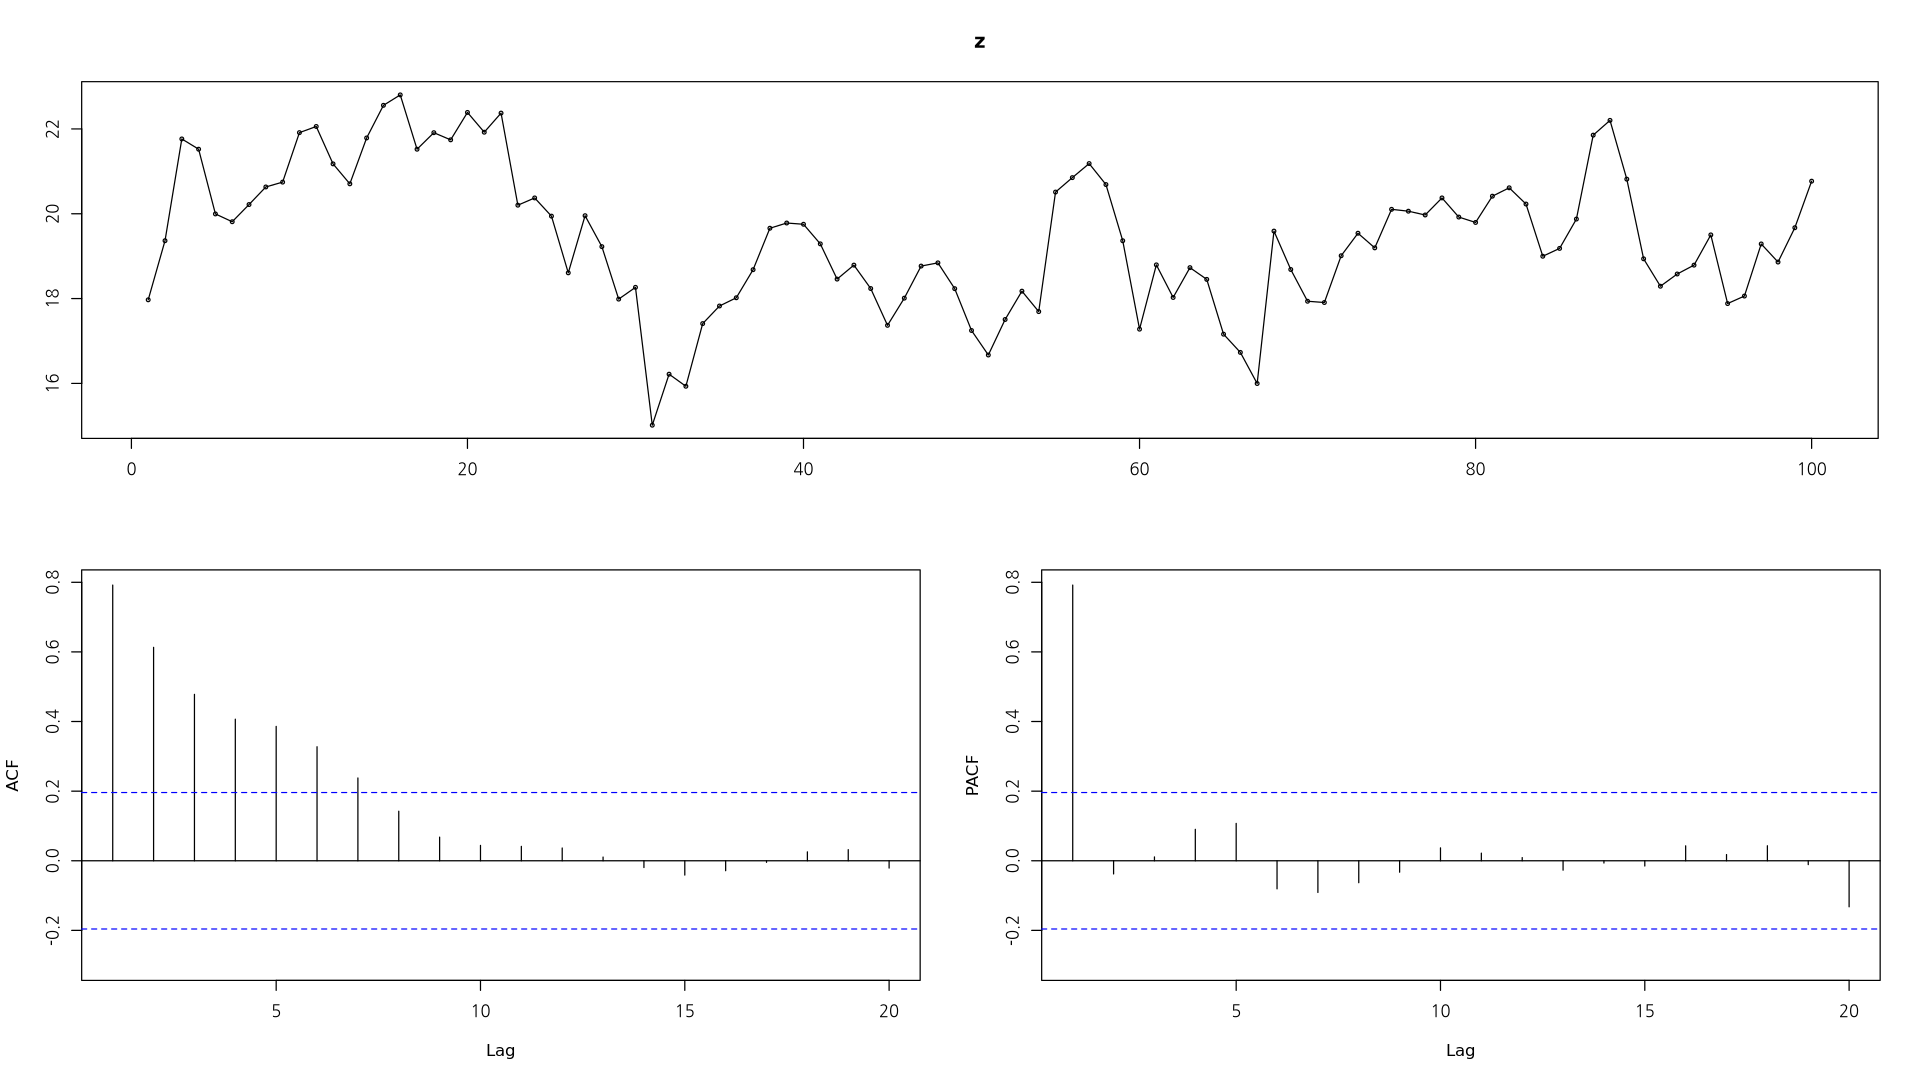

In [30]:
z = sim_ar(100, 20, phi = c(0.8))
tsdisplay(z)

* `arima.sim` 함수 사용

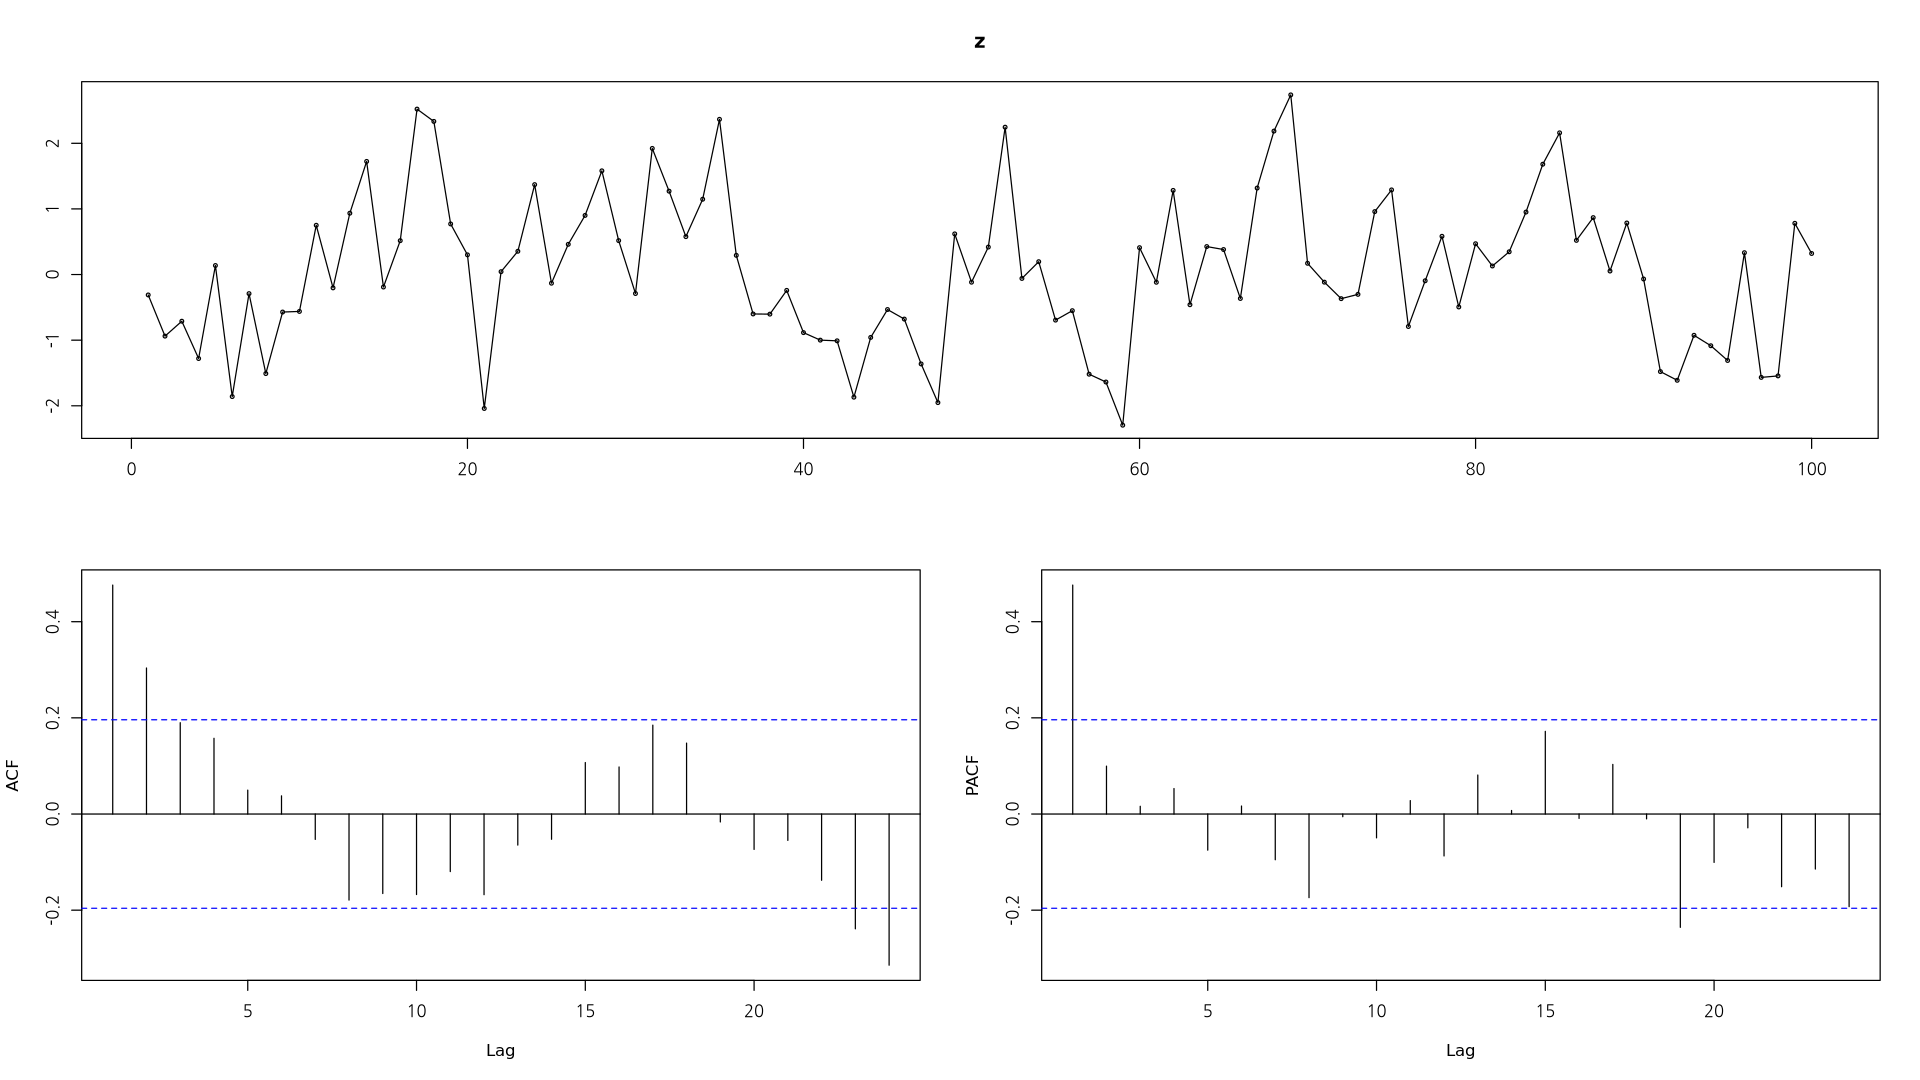

In [39]:
z = arima.sim(n = 100, ## order = c(p, d, q)) ## ARMA : d=0, AR : d=q=0. AR, ARMA, MA
              list(order=c(1,0,0), ar = 0.5), ## coefficient vector ar = c(phi1, phi2)
              rand.gen = rnorm,
              sd = sqrt(1))

tsdisplay(z, lag.max = 24)

> 시계열 그림은 등분산성 만족하고 평균을 중심으로 대칭인 형태.
> 
> ACF는 지수적으로 감소하는 모양, PACF는 첫 차수만 살고 뒤는 절단 형태여야 AR모형임. 그런데 시뮬레이션 할 때마다 다름 ㅇㅇ.

In [35]:
class(z)

[1] "ts"

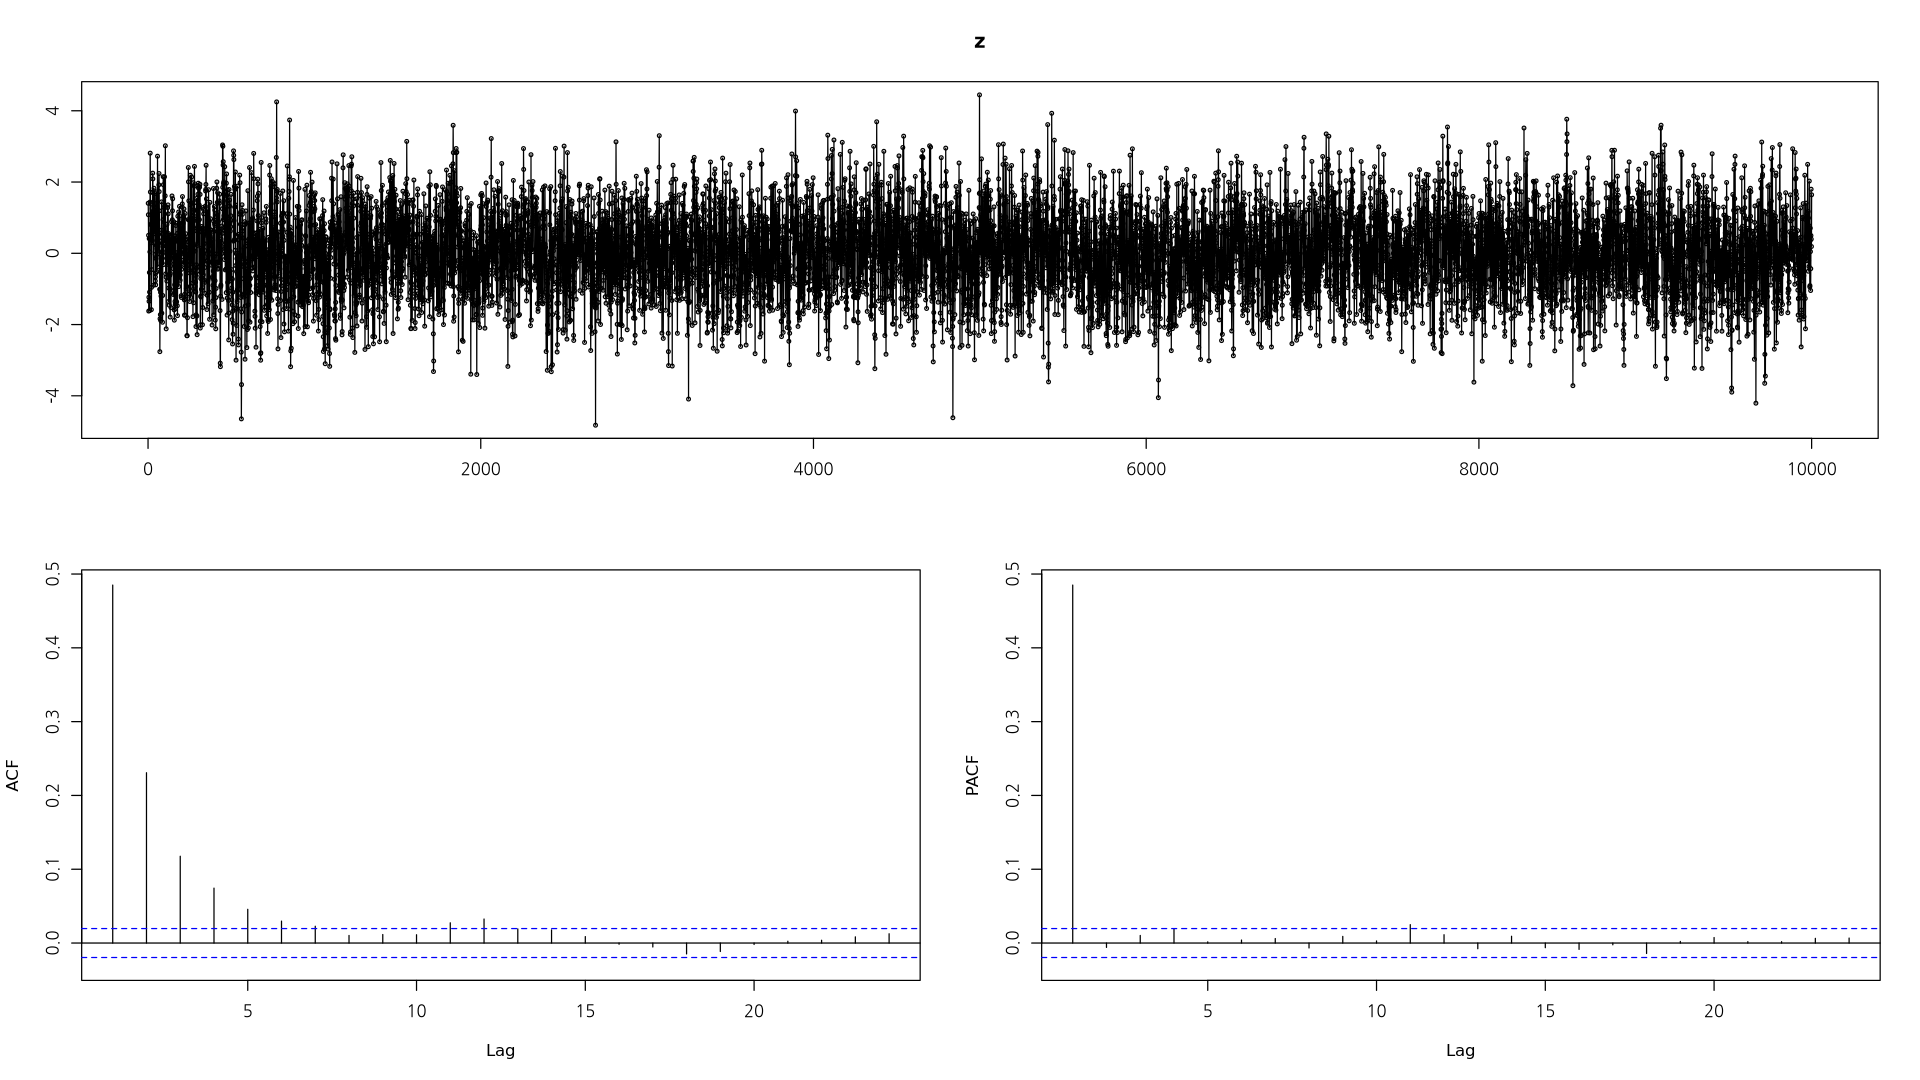

In [40]:
z = arima.sim(n = 10000, ## order = c(p, d, q)) ## ARMA : d=0, AR : d=q=0. AR, ARMA, MA
              list(order=c(1,0,0), ar = 0.5), ## coefficient vector ar = c(phi1, phi2)
              rand.gen = rnorm,
              sd = sqrt(1))

tsdisplay(z, lag.max = 24)

> sample size를 아주 키우면 이론적인 값을 찾을 수 있음 ㅇㅇ

* $AR(2) : Z_t = 0.5 Z_{t-1} - 0.4 Z_{t-2} + \epsilon_t$

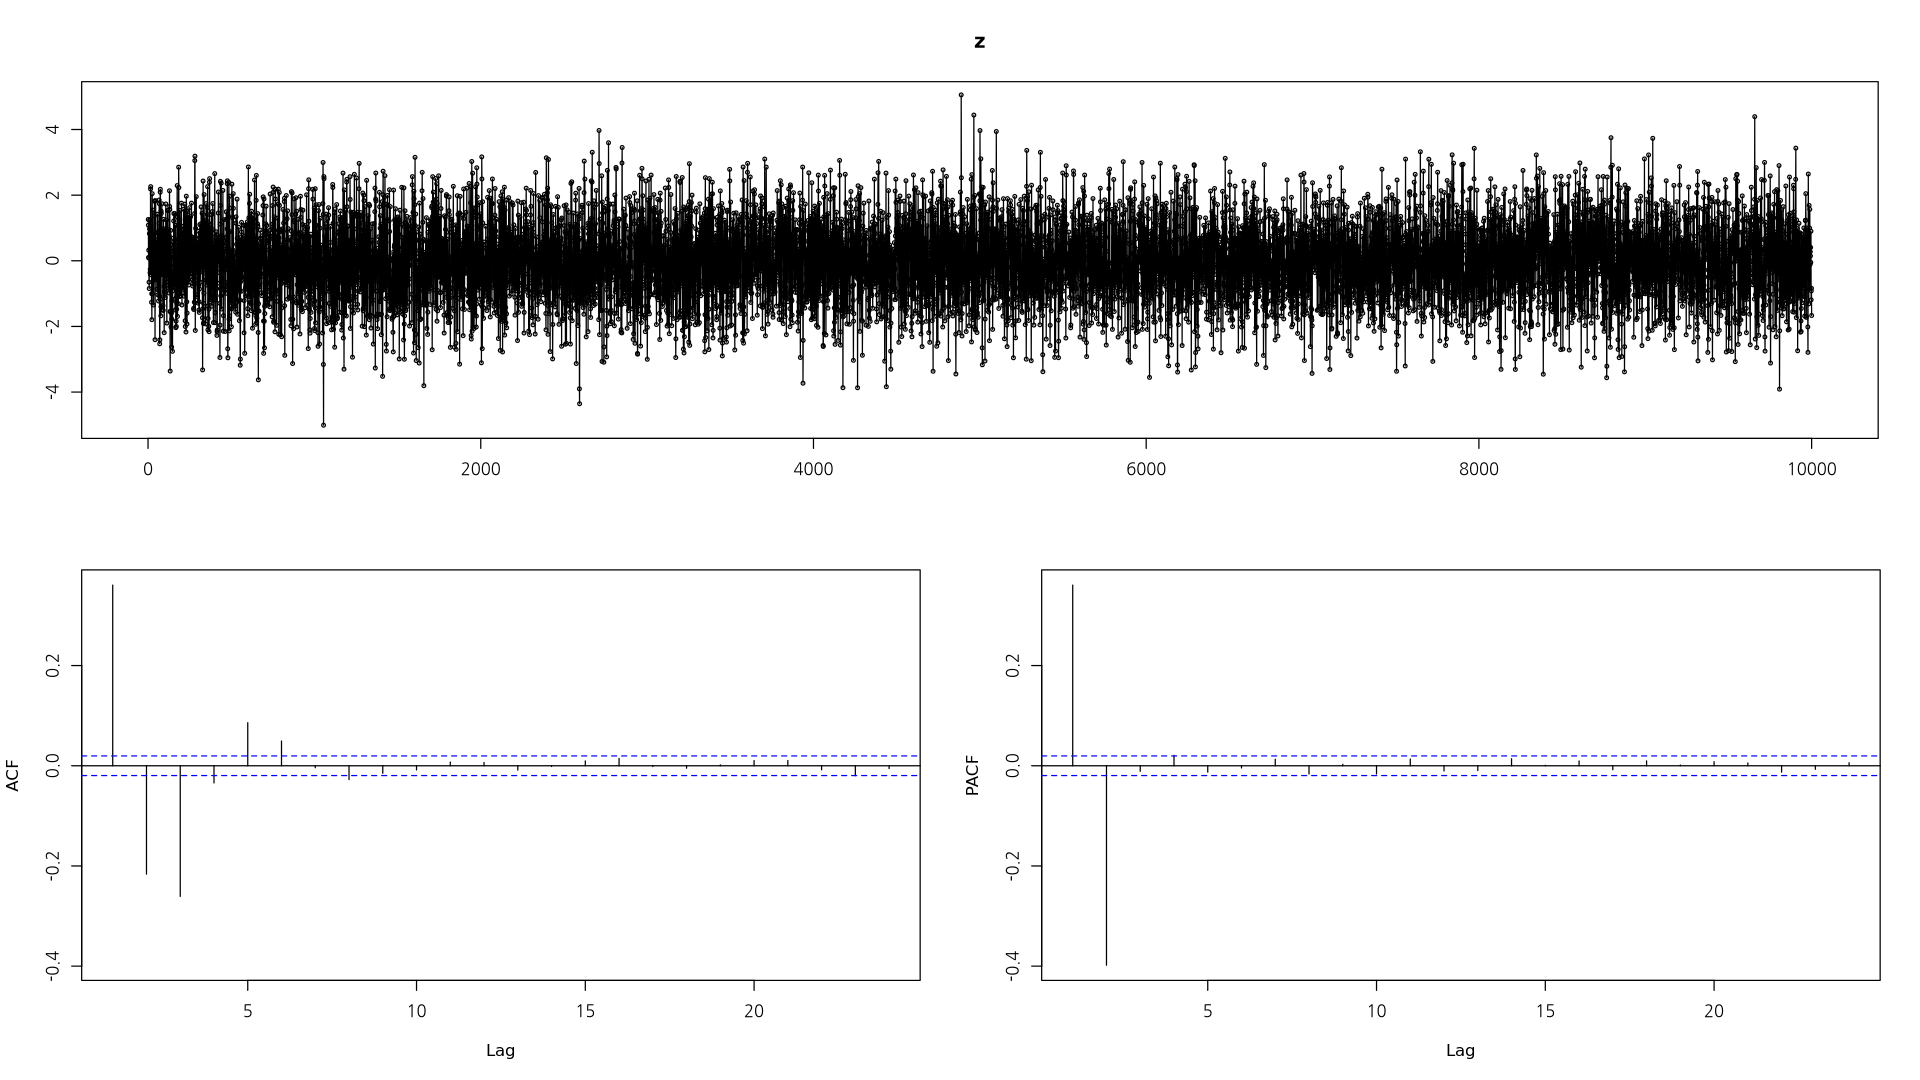

In [43]:
z = arima.sim(n = 10000, list(order=c(2,0,0), ar = c(0.5, -0.4)), ## coefficient vector ar = c(phi1, phi2)
              rand.gen = rnorm,
              sd = sqrt(1))

tsdisplay(z, lag.max = 24)

> sin함수 형태로 감소하고, PACF는 2시차까지만 유효하고 나머지는 절단 형태

* $MA(q)$ process

$Z_t - \mu = \epsilon_t - \theta_1 \epsilon_{t-1} - \cdots - \theta_q \epsilon_{t-q}, ~ \epsilon_t \sim WN(0, \sigma^2)$

In [47]:
sim_ma = function(n, mu, theta) {
    q = length(theta)
    eps = rnorm(n+100)
    z = eps

    for (k in (q+1):(n+100)) {
        n[k] = mu + eps[k] - sum(eps[(k-1):(k-q)]*theta)
    }

    return(z[-(1:100)])
}

* $Z_t = \epsilon_t - 0.9\epsilon_{t-1}$

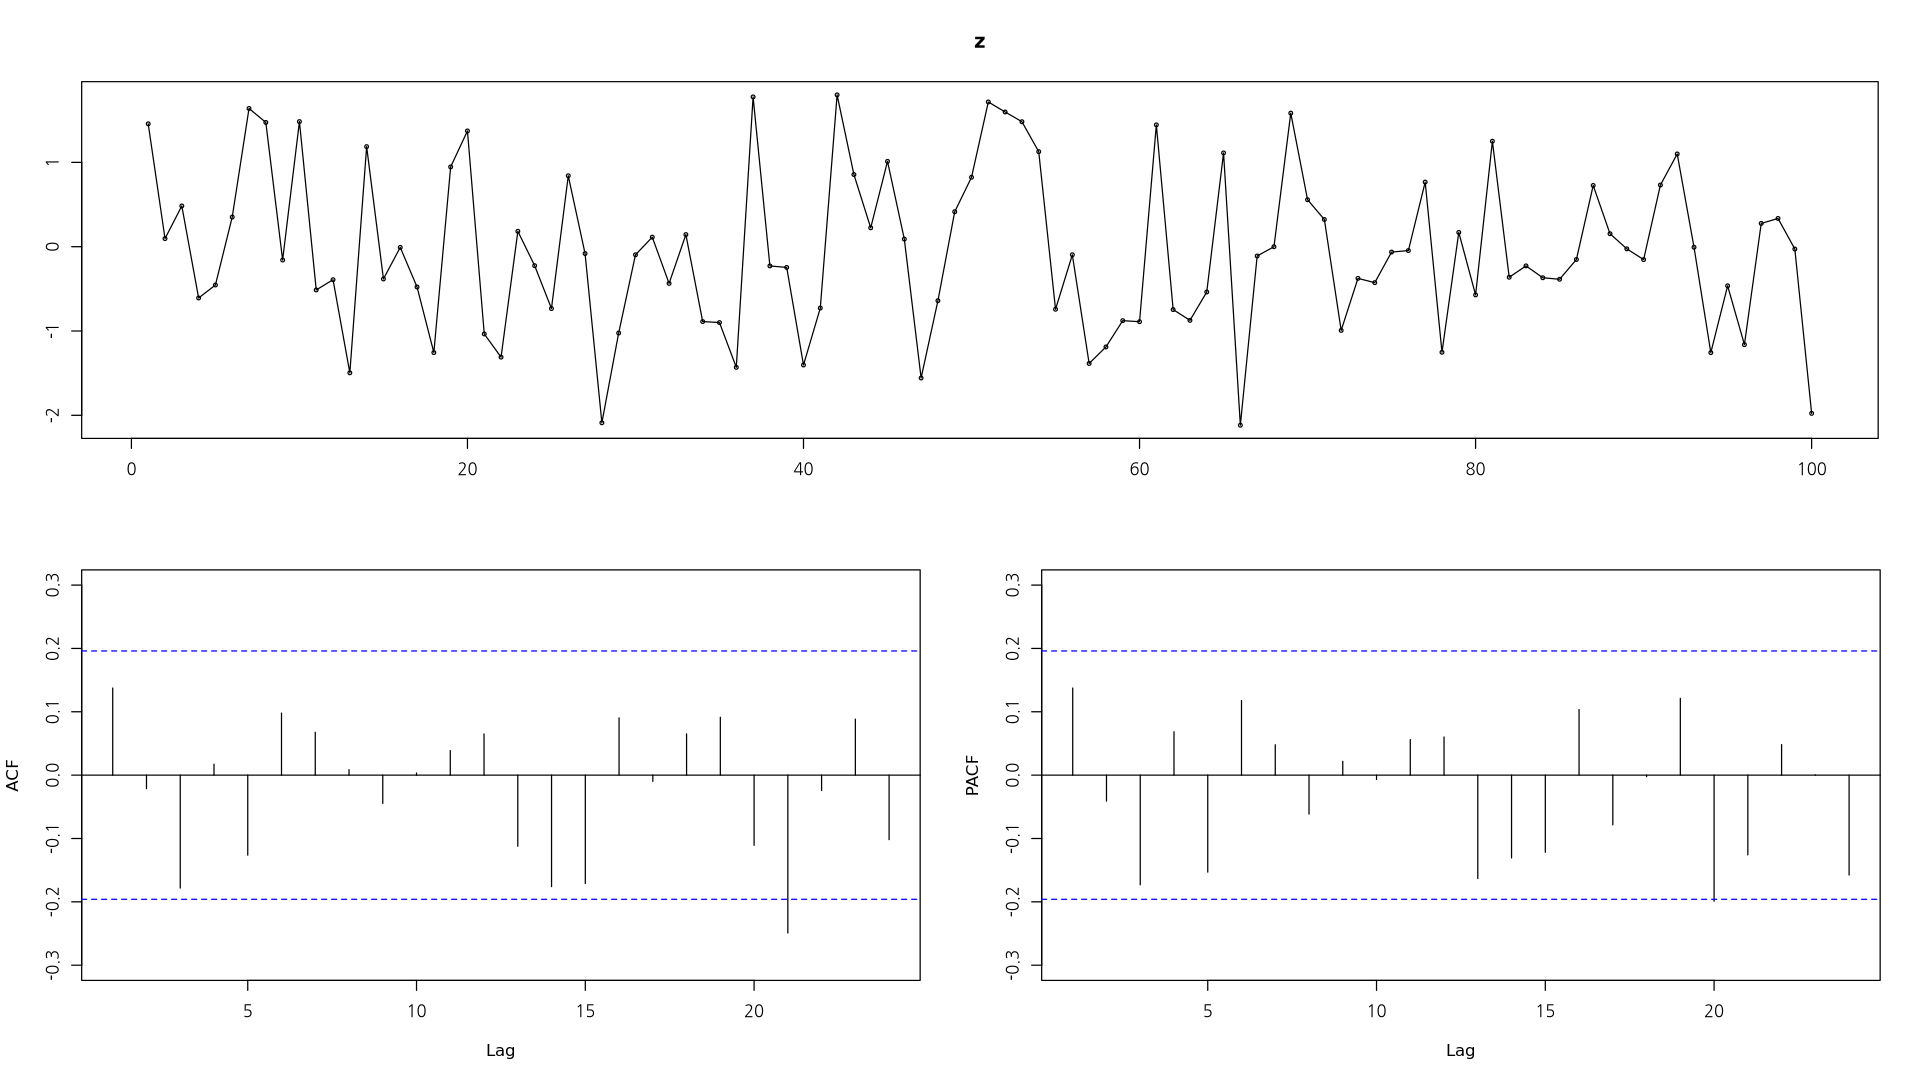

In [51]:
z = sim_ma(100, 0, theta = 0.9)
tsdisplay(z, lag.max = 24)

* `arima.sim`에서의 경우 $\theta$가 양수로 나와서 부호를 바꿔줘야 같은 formula이다.

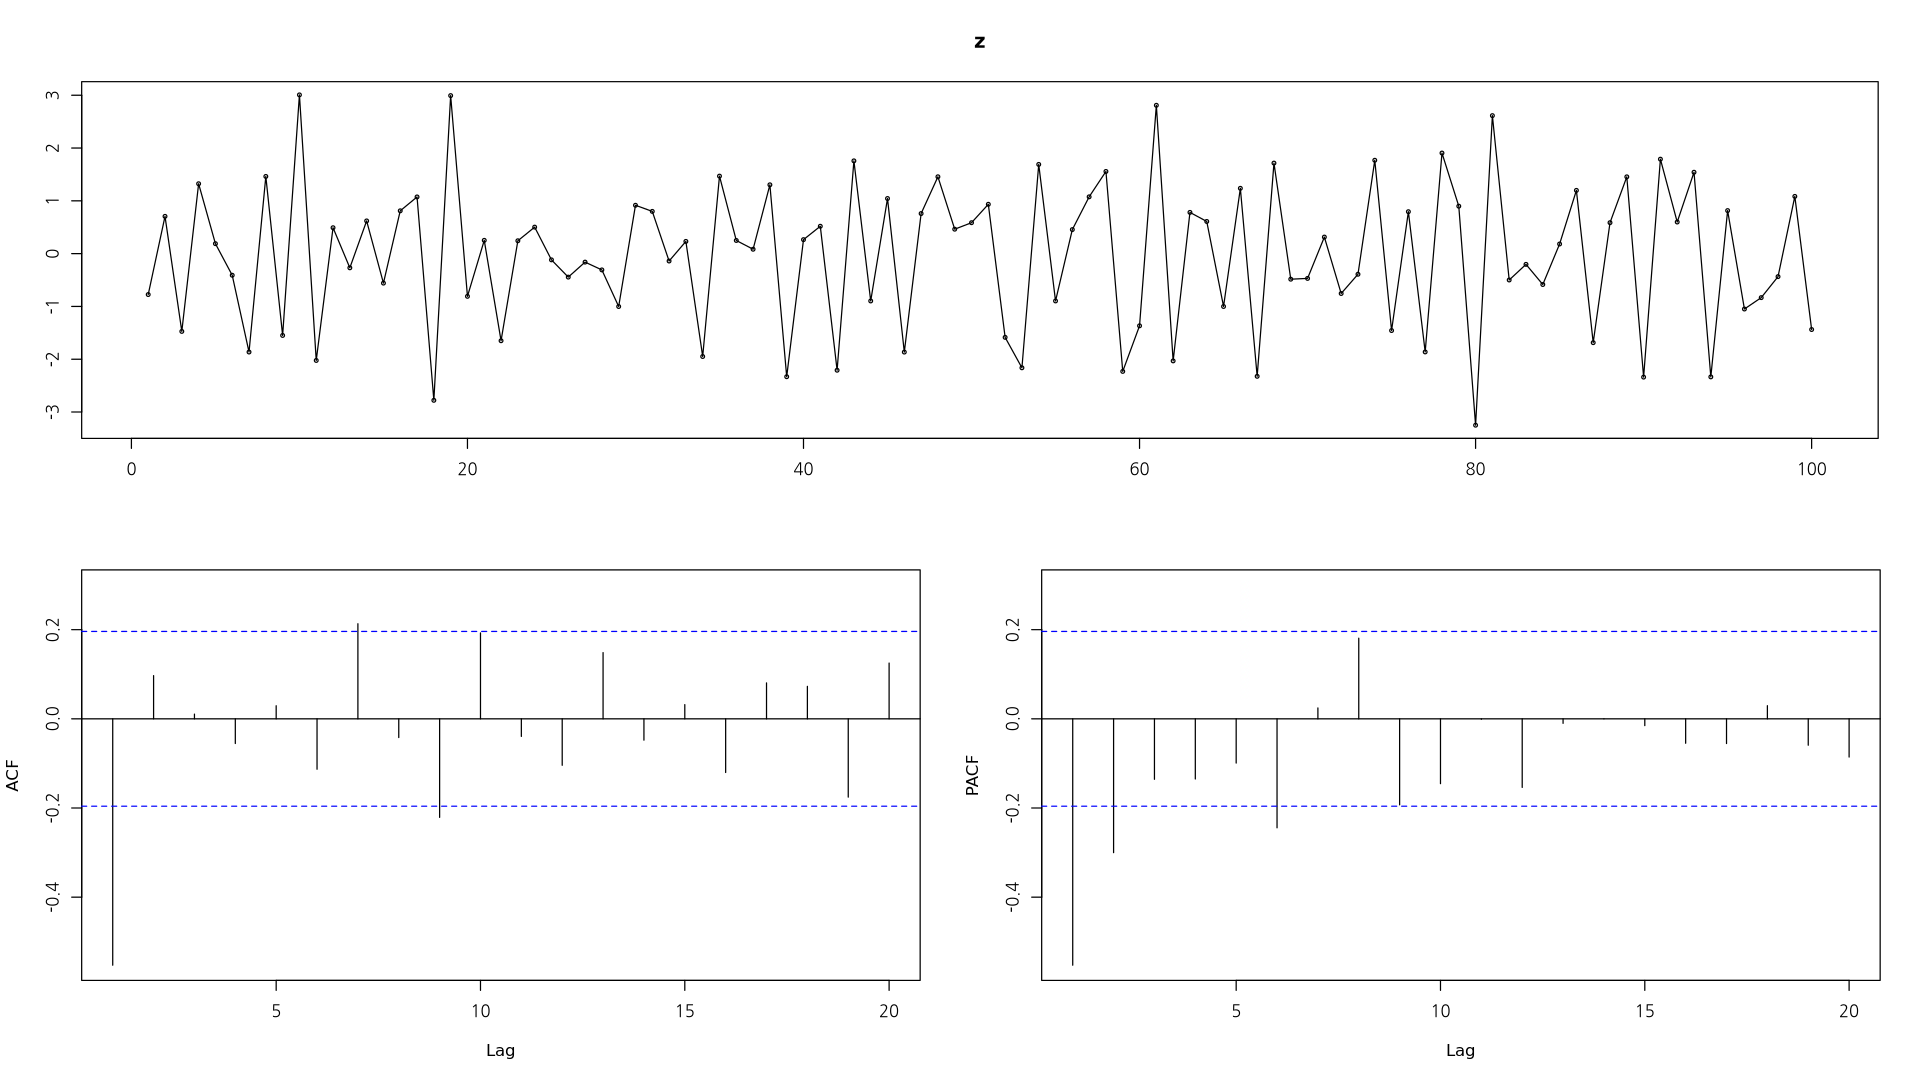

In [57]:
z = arima.sim(n = 100, list(order = c(0, 0, 1), ma = c(-0.9)))
tsdisplay(z)

* $Z_t = \epsilon_t - 0.5\epsilon_{t-1} + 0.2\epsilon_{t-2}$

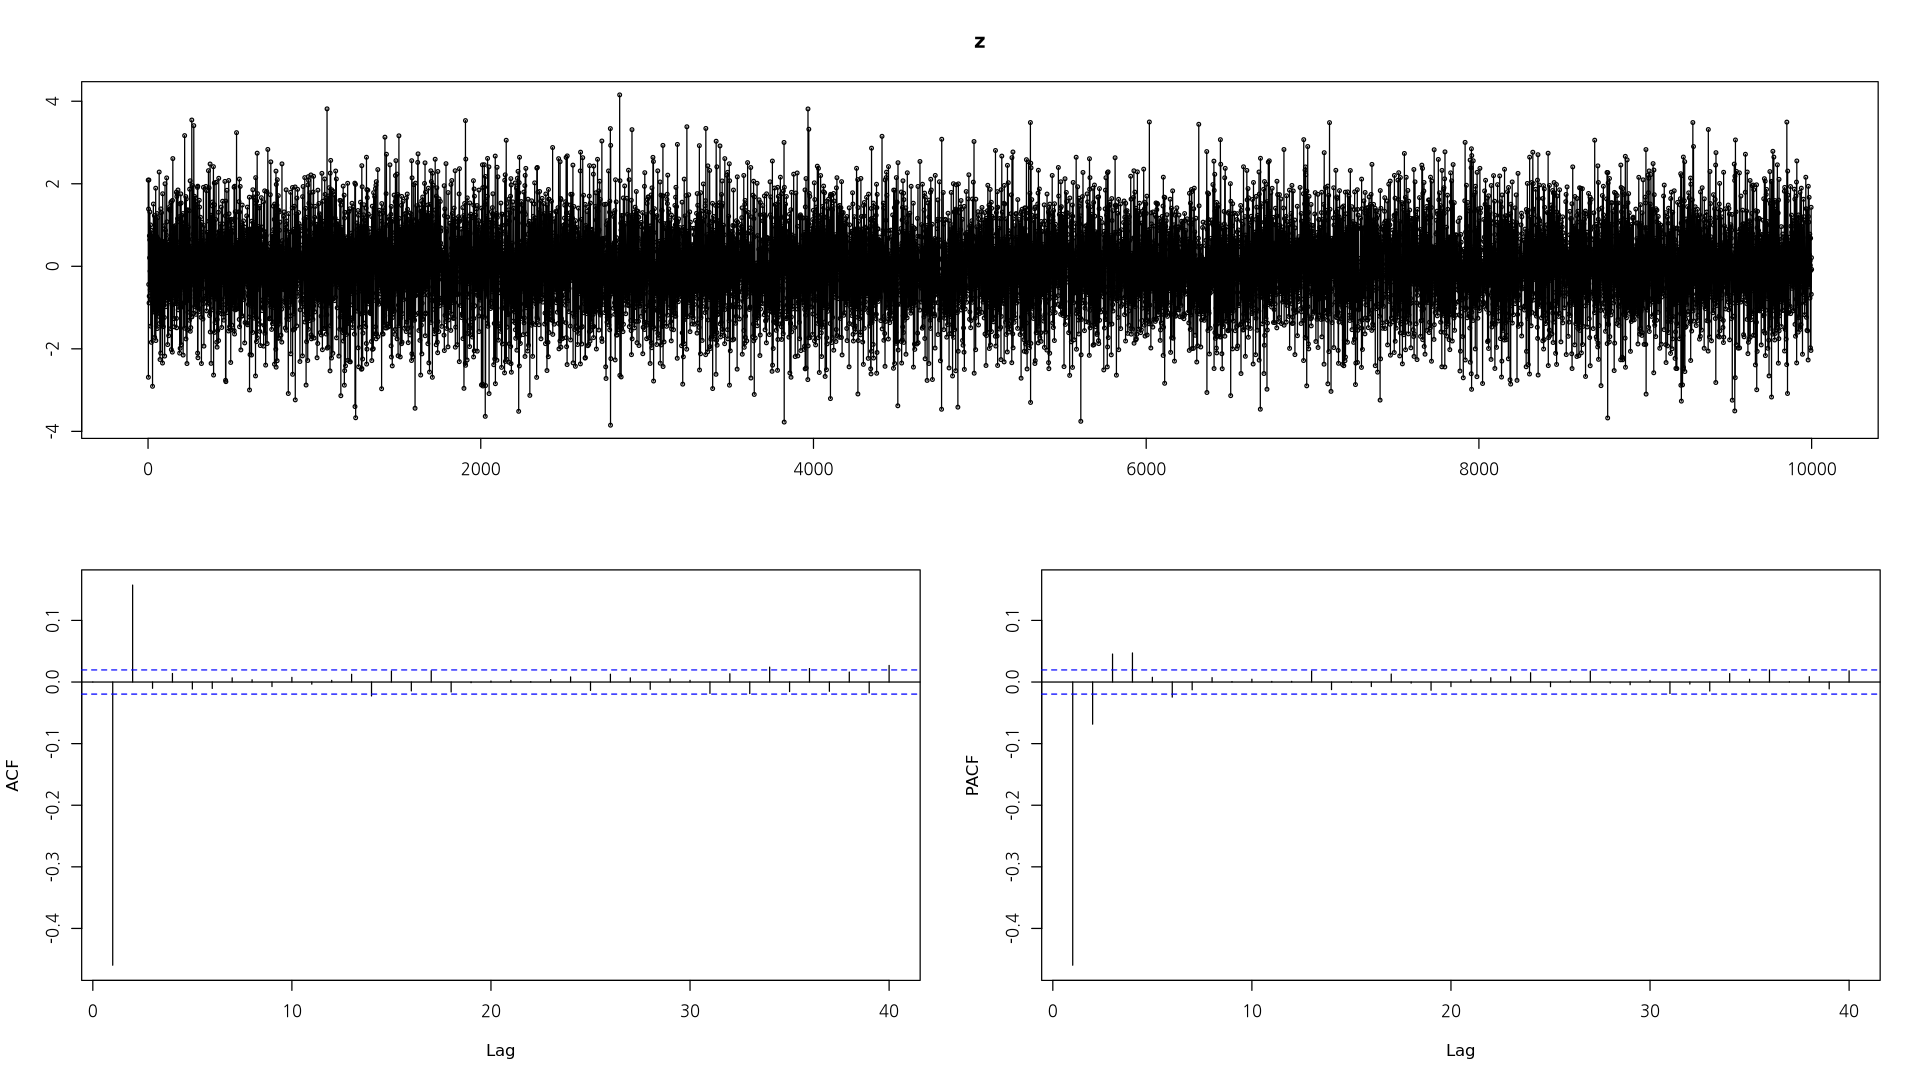

In [63]:
z = arima.sim(n = 10000, list(order = c(0, 0, 2), ma = c(-0.5, 0.2)))
tsdisplay(z)

> AR 모형과 반대로 절단 / 사인함수 형태로 지수적으로 감소

`-` $ARMA(p, q)$ process

$ARMA(1, 1) : Z_t = -0.5Z_{t-1} + \epsilon_t - 0.3\epsilon_{t-1}, ~ \epsilon_t \sim WN(0, 1)$

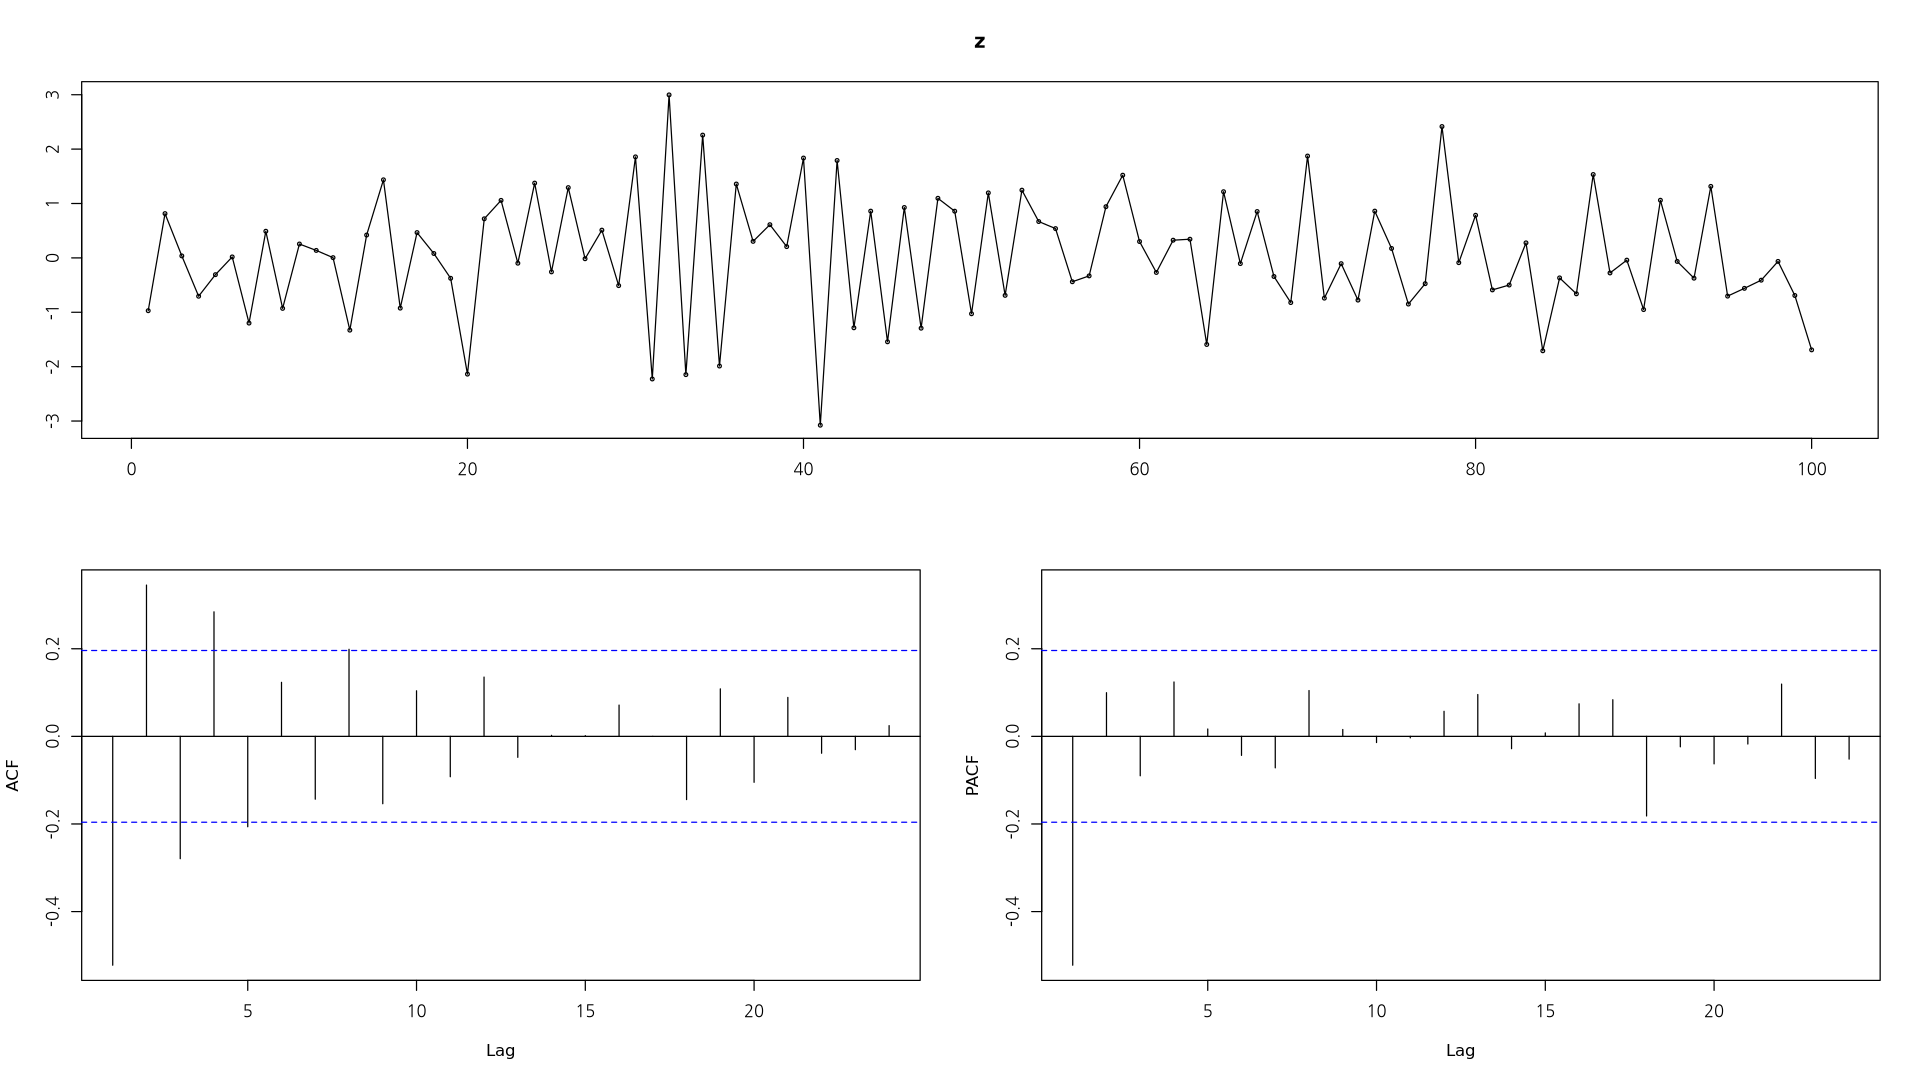

In [64]:
z = arima.sim(n = 100, list(order = c(1, 0, 1), ar = -0.5, ma = -0.3), rand.gen = rnorm)
tsdisplay(z, lag.max = 24)

> 지수적으로 감소하니까 AR(1)일거야. PACF는 절단 형태로 감소하니까 AR(1)일거야. 그런데 ARMA(1, 1)에서 추출한 건데??
>
> 후보모형들을 생각하고 그것들을 비교하는 게 중요